## import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## data loading

In [2]:
train = pd.read_csv('train_with_weather.csv', encoding = "CP949")
test = pd.read_csv('test_with_weather.csv', encoding = "CP949")

In [3]:
train

,일자,holidayNext,holidayBefore,holidayBoth,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,...,기온(°C)(12시),강수량(mm)(12시),습도(%)(12시),적설(cm)(12시),불쾌지수(12시),기온(°C)(18시),강수량(mm)(18시),습도(%)(18시),적설(cm)(18시),불쾌지수(18시)
0,2016-02-01,0,0,0,월,2601,50,150,238,0,...,3.0,NaN,24,NaN,46.01080,0.9,NaN,31,NaN,42.87221
1,2016-02-02,0,0,0,화,2601,50,173,319,0,...,1.7,NaN,24,NaN,44.64892,2.4,NaN,28,NaN,44.90528
2,2016-02-03,0,0,0,수,2601,56,180,111,0,...,3.2,NaN,31,NaN,45.44108,3.0,NaN,39,NaN,44.31130
3,2016-02-04,0,0,0,목,2601,104,220,355,0,...,3.7,NaN,30,NaN,46.10590,4.0,NaN,35,NaN,45.92100
4,2016-02-05,0,0,0,금,2601,278,181,34,0,...,6.3,NaN,17,NaN,50.03229,5.7,NaN,15,NaN,49.61845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,0,0,0,수,2983,75,198,4,391,...,4.8,NaN,31,NaN,47.22812,6.7,NaN,61,NaN,47.05013
1201,2021-01-21,0,0,0,목,2983,92,231,462,351,...,9.1,NaN,52,NaN,50.91968,9.6,0.0,73,NaN,50.57492
1202,2021-01-22,0,0,0,금,2983,255,248,1,303,...,8.4,NaN,94,NaN,47.47904,8.0,NaN,96,NaN,46.65520
1203,2021-01-25,0,0,0,월,2983,107,153,616,327,...,11.3,NaN,54,NaN,53.77198,10.2,NaN,58,NaN,52.12484


## DATA ANALYSIS

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   holidayNext     1205 non-null   int64  
 2   holidayBefore   1205 non-null   int64  
 3   holidayBoth     1205 non-null   int64  
 4   요일              1205 non-null   object 
 5   본사정원수           1205 non-null   int64  
 6   본사휴가자수          1205 non-null   int64  
 7   본사출장자수          1205 non-null   int64  
 8   본사시간외근무명령서승인건수  1205 non-null   int64  
 9   현본사소속재택근무자수     1205 non-null   int64  
 10  조식메뉴            1205 non-null   object 
 11  중식메뉴            1205 non-null   object 
 12  석식메뉴            1205 non-null   object 
 13  중식계             1205 non-null   int64  
 14  석식계             1205 non-null   int64  
 15  확진자 수           1205 non-null   int64  
 16  기온(°C)(12시)     1205 non-null   float64
 17  강수량(mm)(12시)    143 non-null    f

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
holidayNext,1205.0,0.034855,0.183488,0.00000,0.00000,0.00000,0.00000,1.00000
holidayBefore,1205.0,0.031535,0.174832,0.00000,0.00000,0.00000,0.00000,1.00000
holidayBoth,1205.0,0.002490,0.049855,0.00000,0.00000,0.00000,0.00000,1.00000
본사정원수,1205.0,2807.815768,171.264404,2601.00000,2645.00000,2760.00000,2962.00000,3305.00000
본사휴가자수,1205.0,157.913693,144.190572,23.00000,71.00000,105.00000,185.00000,1224.00000
본사출장자수,1205.0,241.142739,43.532298,41.00000,217.00000,245.00000,272.00000,378.00000
본사시간외근무명령서승인건수,1205.0,274.117012,246.239651,0.00000,4.00000,299.00000,452.00000,1044.00000
현본사소속재택근무자수,1205.0,43.506224,109.937400,0.00000,0.00000,0.00000,0.00000,533.00000
중식계,1205.0,890.334440,209.505057,296.00000,758.00000,879.00000,1032.00000,1459.00000
석식계,1205.0,461.772614,139.179202,0.00000,406.00000,483.00000,545.00000,905.00000


## data preprocessing

In [6]:
train = train.fillna(0)
test = test.fillna(0)

In [7]:
train['GotoWork'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수'] #출근자 수
test['GotoWork'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수'] #출근자 수

In [8]:
train['lunchRatio'] = train['중식계']/train['GotoWork']
train['dinnerRatio'] = train['석식계']/train['GotoWork']

## EDA

In [9]:
train

,일자,holidayNext,holidayBefore,holidayBoth,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,...,적설(cm)(12시),불쾌지수(12시),기온(°C)(18시),강수량(mm)(18시),습도(%)(18시),적설(cm)(18시),불쾌지수(18시),GotoWork,lunchRatio,dinnerRatio
0,2016-02-01,0,0,0,월,2601,50,150,238,0,...,0.0,46.01080,0.9,0.0,31,0.0,42.87221,2401,0.432736,0.137859
1,2016-02-02,0,0,0,화,2601,50,173,319,0,...,0.0,44.64892,2.4,0.0,28,0.0,44.90528,2378,0.364592,0.235492
2,2016-02-03,0,0,0,수,2601,56,180,111,0,...,0.0,45.44108,3.0,0.0,39,0.0,44.31130,2365,0.430021,0.242283
3,2016-02-04,0,0,0,목,2601,104,220,355,0,...,0.0,46.10590,4.0,0.0,35,0.0,45.92100,2277,0.429513,0.230567
4,2016-02-05,0,0,0,금,2601,278,181,34,0,...,0.0,50.03229,5.7,0.0,15,0.0,49.61845,2142,0.431839,0.154062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,0,0,0,수,2983,75,198,4,391,...,0.0,47.22812,6.7,0.0,61,0.0,47.05013,2319,0.471324,0.181544
1201,2021-01-21,0,0,0,목,2983,92,231,462,351,...,0.0,50.91968,9.6,0.0,73,0.0,50.57492,2309,0.360329,0.152880
1202,2021-01-22,0,0,0,금,2983,255,248,1,303,...,0.0,47.47904,8.0,0.0,96,0.0,46.65520,2177,0.265962,0.099678
1203,2021-01-25,0,0,0,월,2983,107,153,616,327,...,0.0,53.77198,10.2,0.0,58,0.0,52.12484,2396,0.477880,0.209516


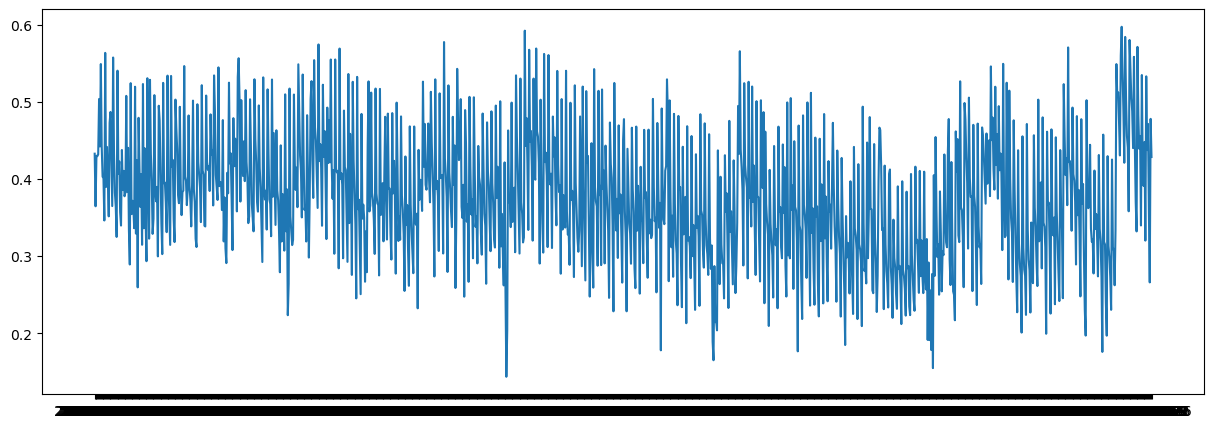

In [10]:
plt.figure(figsize=(15,5))
plt.plot(train['일자'], train['중식계']/train['GotoWork'])

In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train['중식계']/train['GotoWork'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -4.94562348177033
p-value: 2.8402583670254046e-05
Critical Values:
1%: -3.4358340188169882
5%: -2.8639616494853217
10%: -2.5680593310691338


ADF test 결과 출근자 대비 중식계는 stationary한 것으로 보임

In [12]:
train[train['lunchRatio']<0.2]

,일자,holidayNext,holidayBefore,holidayBoth,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,...,적설(cm)(12시),불쾌지수(12시),기온(°C)(18시),강수량(mm)(18시),습도(%)(18시),적설(cm)(18시),불쾌지수(18시),GotoWork,lunchRatio,dinnerRatio
469,2017-12-28,0,0,0,목,2665,240,260,55,0,...,0.0,45.45840,1.1,0.0,48,0.0,40.84972,2165,0.143649,0.113164
645,2018-09-14,0,0,0,금,2763,174,313,132,0,...,0.0,70.02992,22.6,0.0,88,0.0,71.71112,2276,0.177944,0.164763
704,2018-12-21,0,0,0,금,2846,175,261,163,0,...,0.0,53.23414,9.3,0.0,74,0.0,50.06418,2410,0.189212,0.189212
705,2018-12-24,0,1,0,월,2846,894,159,26,0,...,0.0,49.53188,2.8,0.0,39,0.0,44.07208,1793,0.165086,0.058003
801,2019-05-17,0,0,0,금,2825,224,291,1,0,...,0.0,73.73536,23.3,0.0,59,0.0,70.34553,2310,0.176623,0.156710
855,2019-08-02,0,0,0,금,3305,687,237,2,0,...,0.0,83.38736,32.2,0.0,66,0.0,83.98348,2381,0.184796,0.115078
949,2019-12-20,0,0,0,금,3111,337,261,4,0,...,0.0,48.45326,5.3,0.0,45,0.0,46.51915,2513,0.191405,0.140470
951,2019-12-24,0,1,0,화,3111,478,216,52,0,...,0.0,48.76116,5.1,0.0,63,0.0,44.60287,2417,0.191146,0.091436
953,2019-12-27,0,0,0,금,3111,706,236,1,0,...,0.0,48.98640,4.6,0.0,31,0.0,47.00474,2169,0.178423,0.104195
955,2019-12-31,0,1,0,화,3111,709,149,22,0,...,0.0,43.90774,0.0,0.0,27,0.0,42.43900,2253,0.154905,0.000000


In [13]:
train[train['lunchRatio']>0.5]

,일자,holidayNext,holidayBefore,holidayBoth,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,...,적설(cm)(12시),불쾌지수(12시),기온(°C)(18시),강수량(mm)(18시),습도(%)(18시),적설(cm)(18시),불쾌지수(18시),GotoWork,lunchRatio,dinnerRatio
5,2016-02-11,1,0,0,목,2601,383,143,417,0,...,0.0,53.63248,11.8,0.0,51,0.0,54.52282,2075,0.503614,0.265060
7,2016-02-15,0,0,0,월,2601,87,204,482,0,...,0.0,43.44000,0.1,0.0,30,0.0,42.12070,2310,0.548918,0.290909
12,2016-02-22,0,0,0,월,2601,90,207,434,0,...,0.0,47.49184,6.1,0.0,36,0.0,48.26704,2304,0.563368,0.279948
21,2016-03-07,0,0,0,월,2624,50,195,456,0,...,0.0,55.14984,13.5,0.0,56,0.0,56.71140,2379,0.557377,0.262715
26,2016-03-14,0,0,0,월,2624,61,183,376,0,...,0.0,53.23371,10.7,0.0,27,0.0,53.96611,2380,0.540336,0.246218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,2020-12-16,0,0,0,수,2990,195,187,1,359,...,0.0,43.36160,-0.9,0.0,34,0.0,40.40606,2249,0.504669,0.200089
1184,2020-12-21,0,0,0,월,2990,248,153,526,339,...,0.0,44.52958,1.5,0.0,63,0.0,39.44155,2250,0.558222,0.145333
1188,2021-01-04,0,0,0,월,2983,92,91,490,340,...,0.0,43.71993,1.3,0.0,53,0.0,40.45611,2460,0.571138,0.243089
1193,2021-01-11,0,0,0,월,2983,105,158,517,369,...,0.0,37.62230,0.5,0.0,54,0.0,39.25030,2351,0.534666,0.191833


월요일의 경우 구내식당 이용률이 높았음

### 월별 출근자 대비 중식계

In [14]:
start_date = '2016-02'
end_date = '2021-02'

# Create a list of monthly dates
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Convert the dates to strings in the format 'YYYY-MM'
date_list = [date.strftime('%Y-%m') for date in date_range]

print(date_list)

['2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01']


In [15]:
dic = {}
for month in date_list:
    dic[month] = train[train['일자'].str.contains(month)]['lunchRatio'].mean()

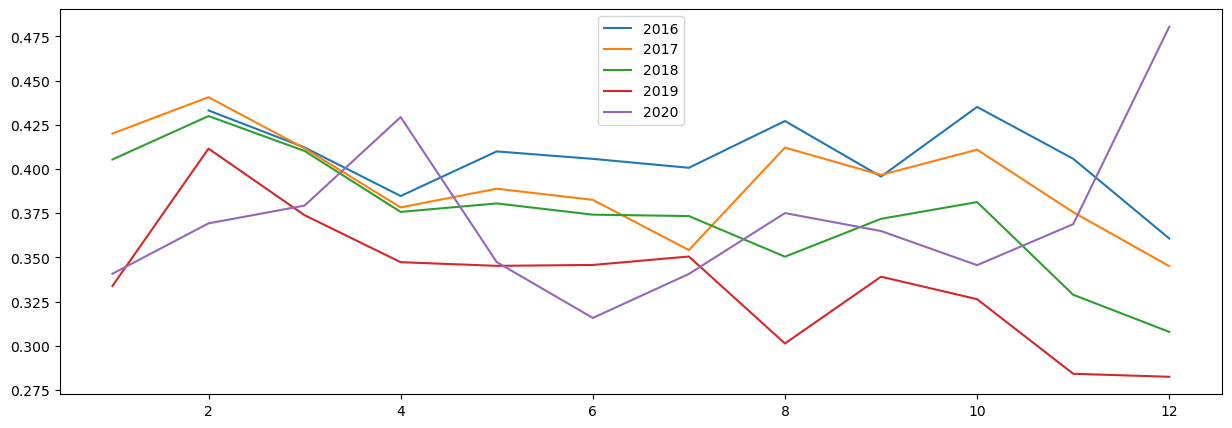

In [16]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(2,13), list(dic.values())[:11], label='2016')
plt.plot(np.arange(1, 13), list(dic.values())[11:23], label='2017')
plt.plot(np.arange(1, 13), list(dic.values())[23:35], label='2018')
plt.plot(np.arange(1, 13), list(dic.values())[35:47], label='2019')
plt.plot(np.arange(1, 13), list(dic.values())[47:59], label='2020')
plt.legend()
plt.show()

In [17]:
dic['2021-01']

0.4335177830627229

비슷한 경향성을 보이던 2016년부터 2019년과 다르게 2020년의 출근자 대비 중식계의 비율은 4월에 오르고, 또 연말에 크게 오른 것을 확인 할 수 있다. 다만, 4월에는 진주시에 첫 코로나 확진자가 발생했고, 이후 잠잠하다가 11월에 다시 증가한 모습이다. 코로나 소식의 경우 충격이 가장 중요한 요소라고 할 수 있다. 1명이 발생해도 처음이라면 큰 충격이고, 10명 발생하다가 1명 발생하면 그렇지 않고. 우리가 보아야 할 기간은 2021년 1월부터 4월까지로 당시 거리두기는 11월 26일 2단계, 2월 13일 1.5단계였다. 어쩌면 새로운 충격에 대한 데이터는 자료가 없기 때문에 짐작을 통해서 적당히 예상해야한다. 혹은 생각할 수 있는 것은 재택근무 비율?

In [18]:
df_aC = train.iloc[956:]

In [19]:
df_aC['home_ratio'] = df_aC['현본사소속재택근무자수']/df_aC['본사정원수']

/var/folders/d5/tqqsc8t17hs79q7vjkb0157w0000gn/T/ipykernel_9508/1409826042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aC['home_ratio'] = df_aC['현본사소속재택근무자수']/df_aC['본사정원수']


In [20]:
df_aC['home_ratio']

956     0.000000
957     0.000000
958     0.001772
959     0.002481
960     0.001772
          ...   
1200    0.131076
1201    0.117667
1202    0.101576
1203    0.109621
1204    0.121354
Name: home_ratio, Length: 249, dtype: float64

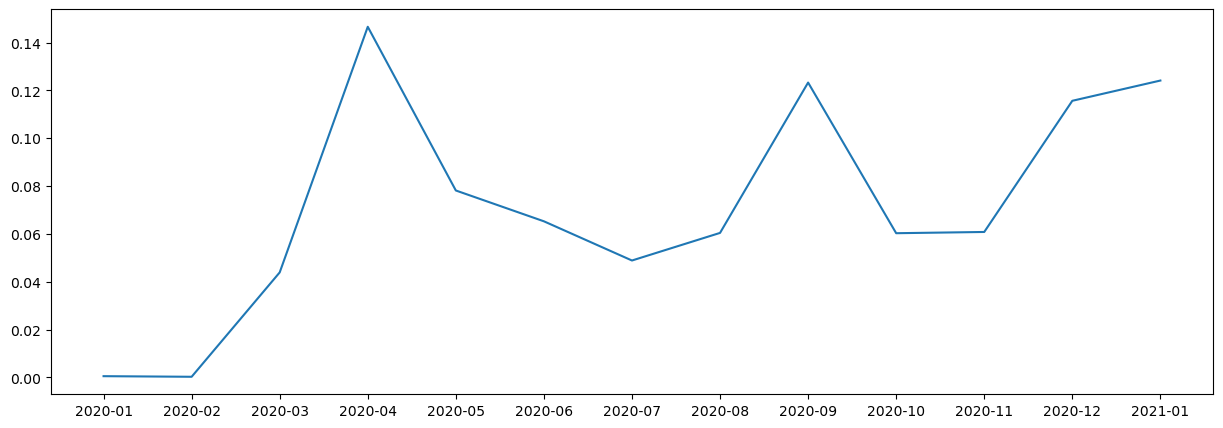

In [21]:
start_date = '2020-01'
end_date = '2021-02'

# Create a list of monthly dates
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Convert the dates to strings in the format 'YYYY-MM'
date_list2 = [date.strftime('%Y-%m') for date in date_range]

home = {}
for month in date_list2:
    home[month] = df_aC[df_aC['일자'].str.contains(month)]['home_ratio'].mean()
plt.figure(figsize=(15,5))
plt.plot(date_list2, list(home.values())[:13])
plt.show()

정원대비 재택 근무자 비율. 4월과 12월에 재택 근무자 비율이 올라간 것을 보면 이것이 다소 늦지만 코로나의 위험성을 알려주는 지표로 사용할 수도 있겠다는 느낌을 준다. 물론 9월에 크게 올라간 것에 대해서는 설명하지 못하지만.

In [22]:
train['home_ratio'] = train['현본사소속재택근무자수']/train['본사정원수']
train['vacation_ratio'] = train['본사휴가자수']/train['본사정원수']
train['overwork_ratio'] = train['본사시간외근무명령서승인건수']/train['본사정원수']
train['holiday'] = (train['holidayNext'] | train['holidayBefore'])
train['month'] = (train['일자'].str)[5:7]
train['date'] = (train['일자'].str)[8:]
train['rain_dinner'] = train['강수량(mm)(18시)'].apply(lambda x: 0 if x == 0 else (1 if 0 < x <= 5 else (2 if 5 < x <= 10 else (3 if 10 < x <= 20 else 4))))
train['rain_lunch'] = train['강수량(mm)(12시)'].apply(lambda x: 0 if x == 0 else (1 if 0 < x <= 5 else (2 if 5 < x <= 10 else (3 if 10 < x <= 20 else 4))))


In [23]:
test['home_ratio'] = test['현본사소속재택근무자수']/test['본사정원수']
test['vacation_ratio'] = test['본사휴가자수']/test['본사정원수']
test['overwork_ratio'] = test['본사시간외근무명령서승인건수']/test['본사정원수']
test['holiday'] = (test['holidayAfter'] | test['holidayBefore'])
test['month'] = (test['일자'].str)[5:7]
test['date'] = (test['일자'].str)[8:]
test['rain_dinner'] = test['강수량(mm)(18시)'].apply(lambda x: 0 if x == 0 else (1 if 0 < x <= 5 else (2 if 5 < x <= 10 else (3 if 10 < x <= 20 else 4))))
test['rain_lunch'] = test['강수량(mm)(12시)'].apply(lambda x: 0 if x == 0 else (1 if 0 < x <= 5 else (2 if 5 < x <= 10 else (3 if 10 < x <= 20 else 4))))


In [24]:
test['확진자 수 (누적 3일)'] = test['확진자 수'].rolling(window=3, min_periods=1).sum()
train['확진자 수 (누적 3일)'] = train['확진자 수'].rolling(window=3, min_periods=1).sum()

In [25]:
train['year'] = (train['일자'].str[:4]).apply(lambda x: int(x) if int(x) < 2020 else 2020)
test['year'] = (test['일자'].str[:4]).apply(lambda x: int(x) if int(x) < 2020 else 2020)

In [26]:
#train = train.append(train[1000:])
#train = train.append(train[1000:])

코로나가 시작한 2020년 3월부터 데이터 오버 샘플링

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import  RandomForestRegressor,ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [28]:
object_columns=train.select_dtypes(include='object').columns.to_list()

In [29]:
for i in object_columns:
    le = LabelEncoder()
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [30]:
train = train[train['석식계']>10]

In [31]:
train.columns

Index(['일자', 'holidayNext', 'holidayBefore', 'holidayBoth', '요일', '본사정원수',
       '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '조식메뉴', '중식메뉴',
       '석식메뉴', '중식계', '석식계', '확진자 수', '기온(°C)(12시)', '강수량(mm)(12시)',
       '습도(%)(12시)', '적설(cm)(12시)', '불쾌지수(12시)', '기온(°C)(18시)', '강수량(mm)(18시)',
       '습도(%)(18시)', '적설(cm)(18시)', '불쾌지수(18시)', 'GotoWork', 'lunchRatio',
       'dinnerRatio', 'home_ratio', 'vacation_ratio', 'overwork_ratio',
       'holiday', 'month', 'date', 'rain_dinner', 'rain_lunch',
       '확진자 수 (누적 3일)', 'year'],
      dtype='object')

In [32]:
X1 = train[['rain_lunch', '요일', 'home_ratio', 'vacation_ratio', 'overwork_ratio', 'holiday', 'month', 'GotoWork', '확진자 수 (누적 3일)', 'year']]
X2 = train[['rain_dinner','요일','home_ratio', 'vacation_ratio', 'overwork_ratio', 'holiday', 'month', 'GotoWork', '확진자 수 (누적 3일)', 'year']]
y1 = train.중식계
y2 = train.석식계

In [33]:
X_train, X_test, y_train,y_test = train_test_split(X1,y1, test_size=.2, random_state=42)
model1 = LGBMRegressor(random_state=42)
model1.fit(X_train,y_train)
print("Model1 Score: ",model1.score(X_test,y_test))
print("MAE:",mean_absolute_error(y_test, model1.predict(X_test)))

X_train, X_test, y_train,y_test = train_test_split(X2,y2, test_size=.2, random_state=42)
model2 = LGBMRegressor(random_state=42)
model2.fit(X_train,y_train)
print("\nModel2 Score: ",model2.score(X_test,y_test))
print("MAE:",mean_absolute_error(y_test, model2.predict(X_test)))

Model1 Score:  0.8152883469079809
MAE: 69.31496135512096

Model2 Score:  0.7428680498500646
MAE: 41.30198313762029


In [34]:
test_X1 = test[['강수량(mm)(12시)','요일', 'home_ratio', 'vacation_ratio', 'overwork_ratio', 'holiday', 'month', 'GotoWork', '확진자 수 (누적 3일)', 'year']]
test_X2 = test[['강수량(mm)(18시)', '요일','home_ratio', 'vacation_ratio', 'overwork_ratio', 'holiday', 'month', 'GotoWork', '확진자 수 (누적 3일)', 'year']]

In [35]:
pred1 = model1.predict(test_X1)
pred2 = model2.predict(test_X2)

In [36]:
sample_submisson = pd.read_csv("sample_submission.csv")

In [37]:
submission = sample_submisson.copy()
submission['중식계'] = pred1
submission['석식계'] = pred2

In [38]:
submission.to_csv("submission.csv",index=False)
submission.head()

,일자,중식계,석식계
0,2021-01-27,894.400329,394.445722
1,2021-01-28,908.715421,379.604529
2,2021-01-29,712.635790,263.817824
3,2021-02-01,1199.159536,500.176629
4,2021-02-02,925.362264,392.043260


## 기타 실험

In [40]:
df = pd.read_csv('train_with_weather.csv',encoding='cp949')

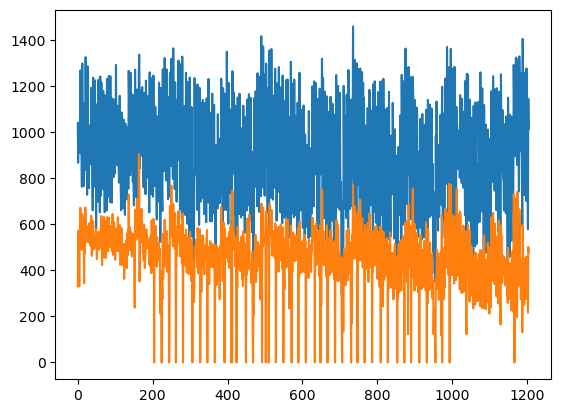

In [41]:
plt.plot(np.arange(1205), df['중식계'])
plt.plot(np.arange(1205), df['석식계'])

In [42]:
df_no = df[df['석식계']>0]

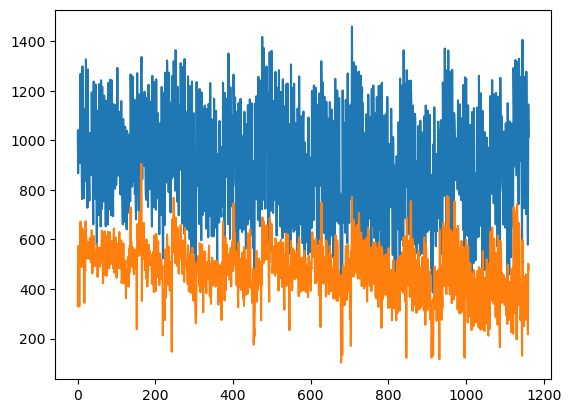

In [43]:
plt.plot(np.arange(1162), df_no['중식계'])
plt.plot(np.arange(1162), df_no['석식계'])

In [44]:
np.corrcoef(df_no['중식계'], df_no['석식계'])

array([[1.        , 0.64433144],
       [0.64433144, 1.        ]])

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
clf = LinearRegression()

In [47]:
clf.fit(df_no[['중식계','본사시간외근무명령서승인건수']],df_no['석식계'])  # 모수 추정

LinearRegression()

In [48]:
print('절편 :', clf.intercept_)
print('회귀 계수 :', clf.coef_)

절편 : 222.6244818526019
회귀 계수 : [0.24160221 0.14376766]


In [49]:
clf.score(df_no[['중식계','본사시간외근무명령서승인건수']],df_no['석식계'])

0.4880809609771236

In [50]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

In [51]:
import pandas as pd
import statsmodels.api as sm

series1 = df_no['중식계']  
series2 = df_no['석식계'] 

# Step 1: Perform unit root tests (ADF or PP)
result1 = sm.tsa.stattools.adfuller(series1)
result2 = sm.tsa.stattools.adfuller(series2)

# Check if both series are stationary (not having unit roots)
if result1[1] < 0.05 and result2[1] < 0.05:
    # Both series are stationary, proceed with cointegration test
    # Step 2: Estimate cointegrating relationship using Engle-Granger two-step method
    model = sm.OLS(series1, sm.add_constant(series2))
    results = model.fit()
    residuals = results.resid

    # Step 3: Perform unit root test on residuals
    result_residuals = sm.tsa.stattools.adfuller(residuals)

    # Step 4: Check for significance of the cointegrating relationship
    if result_residuals[1] < 0.05:
        print("The two time series are cointegrated.")
        print("Cointegrating vector:", results.params)
    else:
        print("The two time series are not cointegrated.")
else:
    print("The two time series are not stationary and may not be suitable for cointegration analysis.")

The two time series are cointegrated.
Cointegrating vector: const    294.852475
석식계        1.245916
dtype: float64


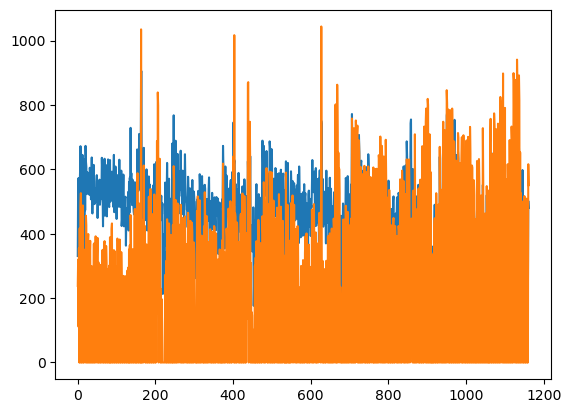

In [52]:
plt.plot(np.arange(1162), df_no['석식계'])
plt.plot(np.arange(1162), df_no['본사시간외근무명령서승인건수'].apply(lambda x: 0 if x < 100 else x))

In [53]:
df[df['본사시간외근무명령서승인건수']<100]['석식계']

4       330
6       598
9       588
11      597
14      514
       ... 
1192    250
1195    360
1197    277
1200    421
1202    217
Name: 석식계, Length: 487, dtype: int64

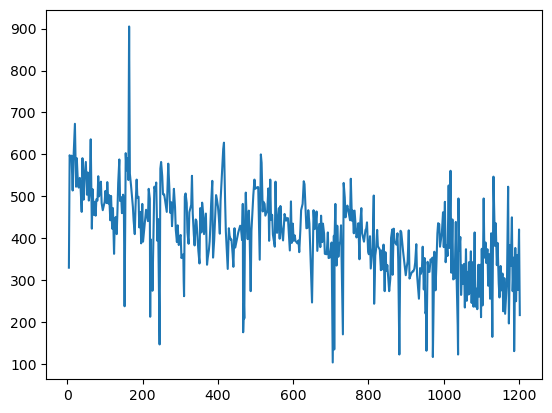

In [54]:
plt.plot(df_no[df_no['본사시간외근무명령서승인건수']<100]['석식계'])

In [55]:
df_no[df_no['본사시간외근무명령서승인건수']>100]['석식계'].mean()

521.91643454039

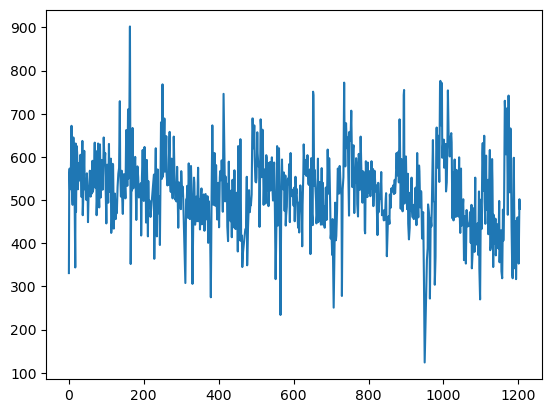

In [56]:
plt.plot(df_no[df_no['본사시간외근무명령서승인건수']>100]['석식계'])

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from gensim import models
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from collections import Counter

train = pd.read_csv('train_with_weather.csv',encoding='cp949')
test = pd.read_csv('test_with_weather.csv',encoding='cp949')

train = train.fillna(0)
test = test.fillna(0)
def process_date(df):
    df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d")
    df['year'] = df['일자'].dt.year
    df['month'] = df['일자'].dt.month
    df['day'] = df['일자'].dt.day
    df = df.drop('일자', axis=1)
    return df

train=process_date(train)
test=process_date(test)
day_mapping = {
    "월": 0,
    "화": 1,
    "수": 2,
    "목": 3,
    "금": 4,
    "토": 5,
    "일": 6
}
train["요일"] = train["요일"].map(day_mapping)
test["요일"] = test["요일"].map(day_mapping)

def l(val):
    return len(val)
train['석식메뉴길이']=train['석식메뉴'].apply(l)
test['석식메뉴길이']=test['석식메뉴'].apply(l)


y_lunch = train['중식계']
y_dinner = train['석식계']

                    
X_train_lunch=train[['holidayNext', 'holidayBefore', '요일', '본사정원수', '본사휴가자수', '본사출장자수',
       '본사시간외근무명령서승인건수', '현본사소속재택근무자수',  '확진자 수', '기온(°C)(12시)',
       '강수량(mm)(12시)', '습도(%)(12시)', '불쾌지수(12시)', 'year', 'month', 'day']]
X_train_dinner=train[['holidayNext', 'holidayBefore', '요일', '본사정원수', '본사휴가자수', '본사출장자수',
       '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '확진자 수', '기온(°C)(18시)',
       '강수량(mm)(18시)', '습도(%)(18시)', '불쾌지수(18시)', 'year', 'month', 'day', '석식메뉴길이']]
X_test_lunch=test[['holidayAfter', 'holidayBefore', '요일', '본사정원수', '본사휴가자수', '본사출장자수',
       '본사시간외근무명령서승인건수', '현본사소속재택근무자수',  '확진자 수', '기온(°C)(12시)',
       '강수량(mm)(12시)', '습도(%)(12시)', '불쾌지수(12시)', 'year', 'month', 'day']]
X_test_dinner=test[['holidayAfter', 'holidayBefore', '요일', '본사정원수', '본사휴가자수', '본사출장자수',
       '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '확진자 수', '기온(°C)(18시)',
       '강수량(mm)(18시)', '습도(%)(18시)', '불쾌지수(18시)', 'year', 'month', 'day', '석식메뉴길이']]
X_train_dinner = X_train_dinner[y_dinner != 0]
y_dinner = y_dinner[y_dinner!= 0]
y_dinner= y_dinner[X_train_dinner['석식메뉴길이']>=20]
X_train_dinner= X_train_dinner[X_train_dinner['석식메뉴길이']>=20]


from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
X_train_lunch, X_test_lunch, y_train_lunch,y_test_lunch = train_test_split(X_train_lunch,y_lunch, test_size=.2, random_state=42)
X_train_dinner, X_test_dinner, y_train_dinner,y_test_dinner = train_test_split(X_train_dinner,y_dinner, test_size=.2, random_state=42)

                    
grid_search.fit(X_train_lunch, y_train_lunch)
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

pred_lunch = grid_search.predict(X_test_lunch)
print("MAE:",mean_absolute_error(y_test_lunch, pred_lunch))

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train_dinner, y_train_dinner)
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

pred_dinner = grid_search.predict(X_test_dinner)
print("MAE:",mean_absolute_error(y_test_dinner, pred_dinner))

MAE: 64.84405808824721
MAE: 44.31911098496597
